# Tarea 2
# Análisis Inteligente de Datos

### Integrantes

- Sebastián Aedo
- Diego Córdova

In [1]:
import numpy as np
import time

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score      
from sklearn.metrics import precision_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import cluster # Técnica de Clustering
from sklearn.neighbors import kneighbors_graph # Técnica de k-Vecino mas cercano
from sklearn.preprocessing import StandardScaler # Ténica para reescalar los datos
from sklearn import metrics

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.tools.tools_pca import pcasvd

import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Diabetes Dataset

vector=['TP','glucose','DBP','TSFT','insulin','mass','DPF','age','status']
diabetes = read_csv('data/pima-indians-diabetes.data',sep=',',names=vector,header=None)

# Hepatitis

A continuación se analizará el dataset de la hepatitis.

Dentro de este dataset se presentan principalmente valores booleanos, 
y la bilirrubina que parece ser una variable contínua, sin embargo,
en la descripción del dataset describen que es un valor **con lazos**, por lo que se podía 
**discretizar**. El objetivo de esta clasificación será intentar predecir la clase a partir
de los otros parámetros.

In [3]:
vector = ["Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", 
          "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
          "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN",
          "PROTIME", "HISTOLOGY"]
hepatitis = read_csv('data/hepatitis.data', sep=',', names=vector, header=None)

In [4]:
hepatitis.info()
hepatitis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null int64
AGE                155 non-null int64
SEX                155 non-null int64
STEROID            155 non-null object
ANTIVIRALS         155 non-null int64
FATIGUE            155 non-null object
MALAISE            155 non-null object
ANOREXIA           155 non-null object
LIVER BIG          155 non-null object
LIVER FIRM         155 non-null object
SPLEEN PALPABLE    155 non-null object
SPIDERS            155 non-null object
ASCITES            155 non-null object
VARICES            155 non-null object
BILIRUBIN          155 non-null object
ALK PHOSPHATE      155 non-null object
SGOT               155 non-null object
ALBUMIN            155 non-null object
PROTIME            155 non-null object
HISTOLOGY          155 non-null int64
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


## Preparando el dataset

Se puede notar que los valores están como `1`, `2` ó `?`. Para manejarlo con mayor facilidad, se reemplazarán por `True`, `False` o `None` según corresponda.

In [5]:
boolean_columns = ["STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE",
     "SPIDERS", "ASCITES", "VARICES", 'HISTOLOGY']
for column in boolean_columns:
    type_data = {'1': False, '2': True, '?': None}
    hepatitis[column] = hepatitis[column].apply(lambda x: type_data[str(x)])

El Sexo se tratará como `M` ó `F`.

In [6]:
type_data = {'1': 'M', '2': 'F', '?': np.nan}
hepatitis['SEX'] = hepatitis['SEX'].apply(lambda x: type_data[str(x)])

In [7]:
type_data = {'1': 'Dead', '2': 'Alive', '?': None}
hepatitis['Class'] = hepatitis['Class'].apply(lambda x: type_data[str(x)])

Ahora se modificarán las otras variables reemplazando el `?` por `None`.

In [8]:
floats = ['BILIRUBIN', 'ALBUMIN']
integers = ['ALK PHOSPHATE', 'SGOT', 'PROTIME']

for column in floats:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')
    
for column in integers:
    hepatitis[column] = pd.to_numeric(hepatitis[column], errors='coerce')

In [9]:
hepatitis.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,Alive,30,F,False,True,True,True,True,False,True,True,True,True,True,1.0,85.0,18.0,4.0,NaN,False
1,Alive,50,M,False,True,False,True,True,False,True,True,True,True,True,0.9,135.0,42.0,3.5,NaN,False
2,Alive,78,M,True,True,False,True,True,True,True,True,True,True,True,0.7,96.0,32.0,4.0,NaN,False
3,Alive,31,M,None,False,True,True,True,True,True,True,True,True,True,0.7,46.0,52.0,4.0,80.0,False
4,Alive,34,M,True,True,True,True,True,True,True,True,True,True,True,1.0,NaN,200.0,4.0,NaN,False


In [10]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
Class              155 non-null object
AGE                155 non-null int64
SEX                155 non-null object
STEROID            154 non-null object
ANTIVIRALS         155 non-null bool
FATIGUE            154 non-null object
MALAISE            154 non-null object
ANOREXIA           154 non-null object
LIVER BIG          145 non-null object
LIVER FIRM         144 non-null object
SPLEEN PALPABLE    150 non-null object
SPIDERS            150 non-null object
ASCITES            150 non-null object
VARICES            150 non-null object
BILIRUBIN          149 non-null float64
ALK PHOSPHATE      126 non-null float64
SGOT               151 non-null float64
ALBUMIN            139 non-null float64
PROTIME            88 non-null float64
HISTOLOGY          155 non-null bool
dtypes: bool(2), float64(5), int64(1), object(12)
memory usage: 22.2+ KB


Para analizar un poco más detenidamente, se hará un pairplot con las columnas no booleanas

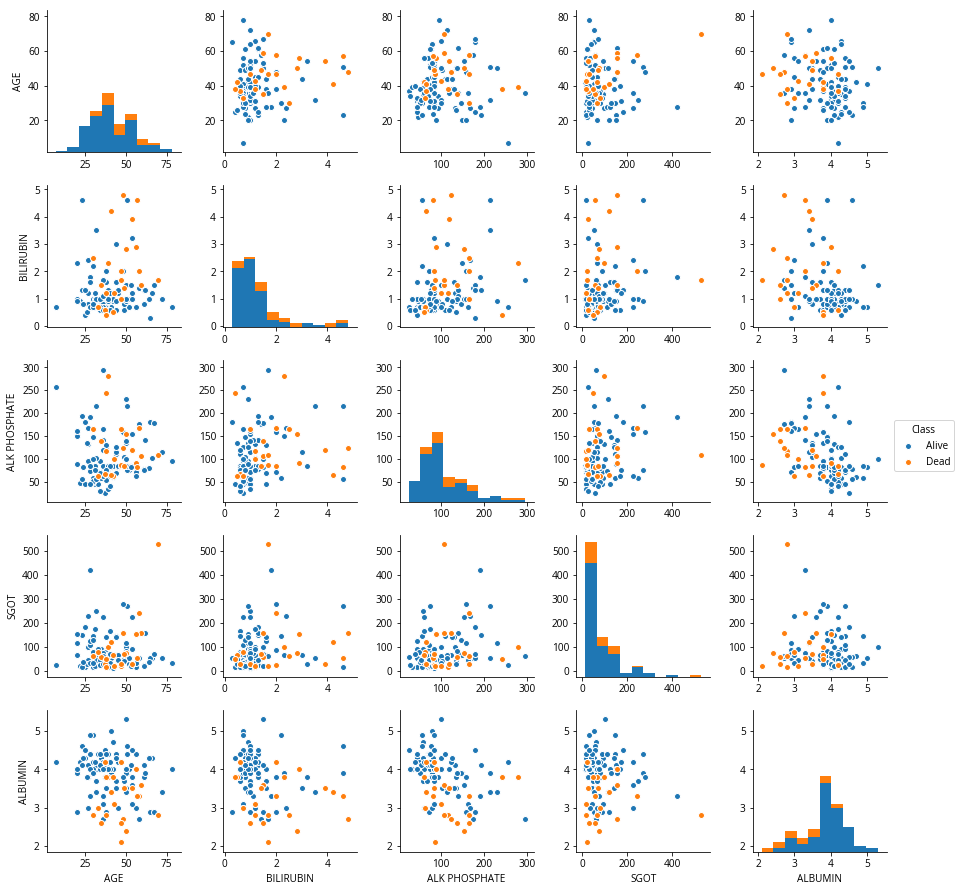

In [11]:
non_boolean = ['AGE', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN']
without_na = hepatitis.loc[:, non_boolean + ['Class']].dropna()
sns.pairplot(without_na, hue='Class')
plt.savefig("hepatitis_pairplot.png", dpi=300)

Luego, se procede a entrenar el clustering usando las variables contínuas

In [22]:
# Esta función es un wrapper para obtener las métricas (y no tener que reescribir codigo)
def get_metrics(f):
    def function_wrapper(*args):
        X, labels_true, labels = f(*args)
        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        if len(args) ==3:
            print('Estimated number of clusters: %d' % n_clusters_)
            print("Homogeneity: %0.6f" % metrics.homogeneity_score(labels_true, labels))
            print("Completeness: %0.6f" % metrics.completeness_score(labels_true, labels))
            print("V-measure: %0.6f" % metrics.v_measure_score(labels_true, labels))
            print("Adjusted Rand Index: %0.6f"
                  % metrics.adjusted_rand_score(labels_true, labels))
            print("Adjusted Mutual Information: %0.6f"
                  % metrics.adjusted_mutual_info_score(labels_true, labels))
        silhouette = metrics.silhouette_score(X, labels)
        print("Silhouette Coefficient: %0.6f"
              % silhouette)
    
        return (labels, silhouette)
    return function_wrapper

## Average Linkage

In [23]:
@get_metrics
def average_linkage(col1, col2, metrics=False):
    X = hepatitis.loc[:, [col1, col2]].dropna()
    y = hepatitis.loc[X.index,'Class']
    X = StandardScaler().fit_transform(X)
    
    algoritmo = cluster.AgglomerativeClustering(linkage="average", 
                                            affinity="cityblock", n_clusters=2)
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)


Se probará el método *Average Linkage* con todas las variables contínuas y se quedará con el mejor para testear todos los métodos siguientes.

In [27]:
# Tupla que contendra (indice_silhouette, col1, col2, prediccion)
# necesaria para quedarse con el mejor
better_coef = (0, "", "", "")

# lista que contendra los test ya hechos ya que (col1, col2) = (col2, col1).
tested = []

for col1 in non_boolean:
    for col2 in non_boolean:
        
        if col1 == col2 or (col2, col1) in tested:
            continue
            
        tested.append((col1, col2))
        print("%s & %s" % (col1, col2))
        
        current = average_linkage(col1, col2)
        if current[1] > better_coef[0]:
            better_coef = (current[1], col1, col2, current[0])
        print("----------")

print("better was %s %s:\n" % better_coef[1:3])
average_linkage(*better_coef[1:3], True);

AGE & BILIRUBIN
Tiempo de ajuste: 0.002
Silhouette Coefficient: 0.699767
----------
AGE & ALK PHOSPHATE
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.511753
----------
AGE & SGOT
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.709184
----------
AGE & ALBUMIN
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.584125
----------
BILIRUBIN & ALK PHOSPHATE
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.600505
----------
BILIRUBIN & SGOT
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.738456
----------
BILIRUBIN & ALBUMIN
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.718782
----------
ALK PHOSPHATE & SGOT
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.708185
----------
ALK PHOSPHATE & ALBUMIN
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.513277
----------
SGOT & ALBUMIN
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.686738
----------
better was BILIRUBIN SGOT:

Tiempo de ajuste: 0.001
Estimated number of clusters: 2
Homogeneity: 0.043515
Completeness: 0.306446
V-measu

In [43]:
def compare(better_coef, fname):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(16,6))

    fig.suptitle("%s & %s" % better_coef[1:3])
    to_plot = hepatitis.loc[:,better_coef[1:3]].dropna()
    ax1.scatter(to_plot[better_coef[1]], to_plot[better_coef[2]],
                color=list(map(lambda x: ['orange', 'steelblue'][x], better_coef[3])))
    ax1.set_title(fname)

    to_plot = hepatitis.loc[:,list(better_coef[1:3]) + ['Class']].dropna()
    ax2.scatter(to_plot[better_coef[1]], to_plot[better_coef[2]], 
                color=list(map(lambda x: 'orange' if x == 'Alive' else 'steelblue', to_plot['Class'])))
    ax2.set_title("Original Data");

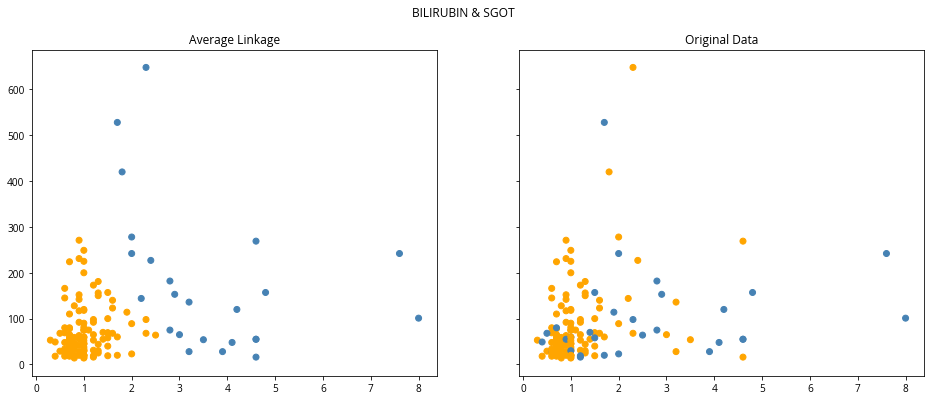

In [39]:
compare(better_coef, "Average Linkage")

Se puede apreciar que a pesar de que se tuvo un índice de Silhouette bastante alto, la clasificación es bastante mala.

##  K–Means

In [40]:
@get_metrics
def kmeans(col1, col2, metrics=False):
    X = hepatitis.loc[:, [col1, col2]].dropna()
    y = hepatitis.loc[X.index,'Class']
    X = StandardScaler().fit_transform(X)
    
    algoritmo = cluster.KMeans(n_clusters=2)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)

In [41]:
better_coef = (0, "", "")
tested = []
for col1 in non_boolean:
    for col2 in non_boolean:
        if col1 == col2 or (col2, col1) in tested:
            continue
        tested.append((col1, col2))
        print("%s & %s" % (col1, col2))
        current = kmeans(col1, col2)
        if current[1] > better_coef[0]:
            better_coef = (current[1], col1, col2, current[0])
        print("----------")

print("better was %s %s:\n" % better_coef[1:3])
kmeans(*better_coef[1:3], True);

AGE & BILIRUBIN
Tiempo de ajuste: 0.023
Silhouette Coefficient: 0.440459
----------
AGE & ALK PHOSPHATE
Tiempo de ajuste: 0.016
Silhouette Coefficient: 0.371482
----------
AGE & SGOT
Tiempo de ajuste: 0.015
Silhouette Coefficient: 0.406780
----------
AGE & ALBUMIN
Tiempo de ajuste: 0.017
Silhouette Coefficient: 0.411764
----------
BILIRUBIN & ALK PHOSPHATE
Tiempo de ajuste: 0.018
Silhouette Coefficient: 0.561052
----------
BILIRUBIN & SGOT
Tiempo de ajuste: 0.019
Silhouette Coefficient: 0.629027
----------
BILIRUBIN & ALBUMIN
Tiempo de ajuste: 0.018
Silhouette Coefficient: 0.537944
----------
ALK PHOSPHATE & SGOT
Tiempo de ajuste: 0.019
Silhouette Coefficient: 0.493828
----------
ALK PHOSPHATE & ALBUMIN
Tiempo de ajuste: 0.019
Silhouette Coefficient: 0.481796
----------
SGOT & ALBUMIN
Tiempo de ajuste: 0.021
Silhouette Coefficient: 0.443867
----------
better was BILIRUBIN SGOT:

Tiempo de ajuste: 0.023
Estimated number of clusters: 2
Homogeneity: 0.113938
Completeness: 0.129590
V-measu

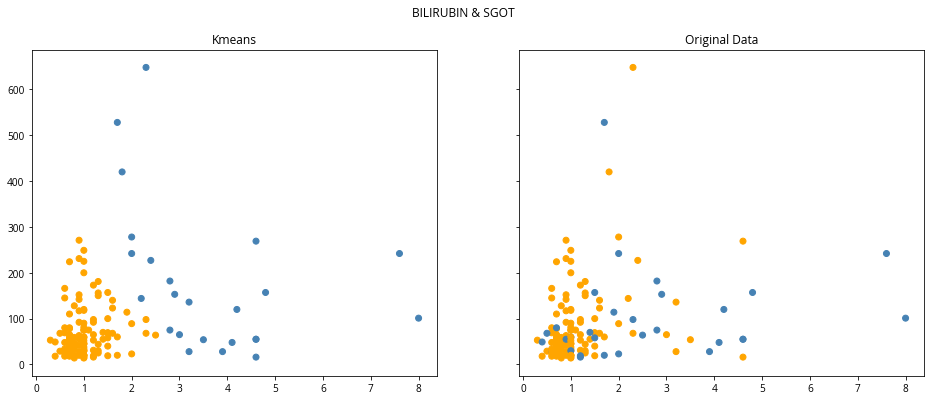

In [42]:
compare(better_coef, "Kmeans")

# DBSCAN

In [44]:
@get_metrics
def dbscan(col1, col2, metrics=False):
    X = hepatitis.loc[:, [col1, col2]].dropna()
    y = hepatitis.loc[X.index,'Class']
    X = StandardScaler().fit_transform(X)
    
    algoritmo = cluster.DBSCAN(eps=.2)
    
    t0 = time.time()
    algoritmo.fit(X)
    t1 = time.time()

    tiempo_ajuste = t1 - t0
    print("Tiempo de ajuste: %.3f" % tiempo_ajuste)
    
    y_pred = algoritmo.labels_.astype(np.int)
    return (X, y, y_pred)

In [45]:
better_coef = (0, "", "")
tested = []
for col1 in non_boolean:
    for col2 in non_boolean:
        if col1 == col2 or (col2, col1) in tested:
            continue
        tested.append((col1, col2))
        print("%s & %s" % (col1, col2))
        current = dbscan(col1, col2)
        if current[1] > better_coef[0]:
            better_coef = (current[1], col1, col2, current[0])
        print("----------")

print("better was %s %s:\n" % better_coef[1:3])
dbscan(*better_coef[1:3], True);

AGE & BILIRUBIN
Tiempo de ajuste: 0.008
Silhouette Coefficient: 0.095648
----------
AGE & ALK PHOSPHATE
Tiempo de ajuste: 0.001
Silhouette Coefficient: -0.026807
----------
AGE & SGOT
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.160455
----------
AGE & ALBUMIN
Tiempo de ajuste: 0.002
Silhouette Coefficient: -0.096695
----------
BILIRUBIN & ALK PHOSPHATE
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.017122
----------
BILIRUBIN & SGOT
Tiempo de ajuste: 0.002
Silhouette Coefficient: 0.253248
----------
BILIRUBIN & ALBUMIN
Tiempo de ajuste: 0.002
Silhouette Coefficient: 0.162875
----------
ALK PHOSPHATE & SGOT
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.172745
----------
ALK PHOSPHATE & ALBUMIN
Tiempo de ajuste: 0.001
Silhouette Coefficient: 0.037612
----------
SGOT & ALBUMIN
Tiempo de ajuste: 0.002
Silhouette Coefficient: 0.048258
----------
better was BILIRUBIN SGOT:

Tiempo de ajuste: 0.001
Estimated number of clusters: 2
Homogeneity: 0.108401
Completeness: 0.069361
V-mea

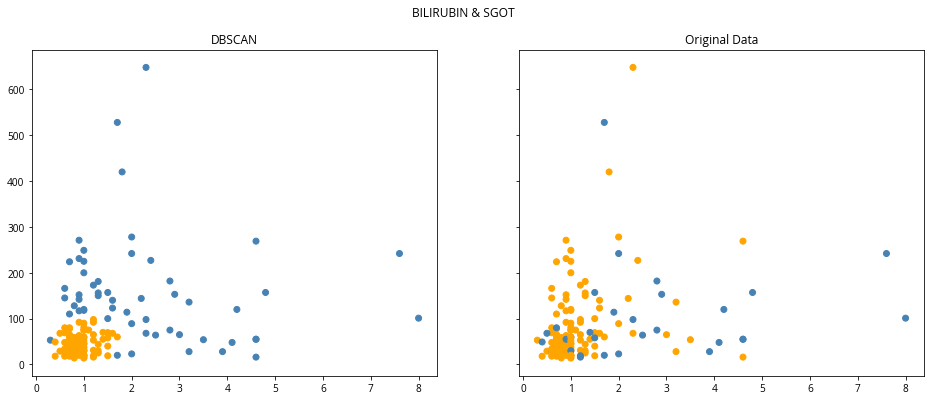

In [46]:
compare(better_coef, "DBSCAN")